In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#@title Module1: Imports
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
nltk.download('stopwords')
stop_words=set(stopwords.words("english"))
##############################################################

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
#@title Module2: Preprocess


def rem_symbols(line):
  #return re.sub("[^A-Aa-z0-9\s]+",'', line)
  return re.sub('[^A-Za-z0-9\s]+', '', line).lower()

def preprocess_string(x):
  final_list = []
  x = x.replace(',',' ').split(' ')
  for word in x:
        word = rem_symbols(word)
        if word and word not in stop_words:
          word = porter.stem(word)
          print(word)
          final_list.append(word)
  return final_list

import pandas as pd
gutenberg_meta = pd.read_csv("/content/drive/MyDrive/2021_codes/gutenberg_metadata.csv")
gutenberg_meta['book_id']=gutenberg_meta.Link.apply(lambda x: x.split('/')[-1])
def retrieve_docs(my_list1):
  my_list = list(set(my_list))  # [(23,3), (24,1), (244,2), (23,12)]
  my_sorted_list = sorted(my_list,key=lambda x: x[1],reverse=True)
  docs = list(set([i for i,j in my_sorted_list]))
  return docs

In [4]:
####
import pandas as pd
import re
A = pd.DataFrame({},columns=['Title','Author','info_abt_paper','text_block'])

def load_row(my_row):
  A.loc[len(A.index)+1] = my_row

with open("/content/drive/MyDrive/CRAN/Unzipped_cran/cran.all.1400", 'r') as x:
  #next(x) # it is used when first line contains column names
  full_string = x.read()
  full_string = full_string.replace('\n',' ').split(".I")[1:]
  for seg in full_string:
    seg = seg.replace(".T","_").replace(".A","_").replace(".B","_").replace(".W","_")
    seg=seg.split("_")[1:]
    load_row(seg[:4])
A.index.name = 'ID'
A=A.reset_index()


In [5]:
A.head(2)

,ID,Title,Author,info_abt_paper,text_block
0,1,experimental investigation of the aerodynamic...,"brenckman,m.","j. ae. scs. 25, 1958, 324.",experimental investigation of the aerodynamic...
1,2,simple shear flow past a flat plate in an inc...,ting-yili,"department of aeronautical engineering, renss...",simple shear flow past a flat plate in an inc...


In [6]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              1400 non-null   int64 
 1   Title           1400 non-null   object
 2   Author          1400 non-null   object
 3   info_abt_paper  1400 non-null   object
 4   text_block      1400 non-null   object
dtypes: int64(1), object(4)
memory usage: 54.8+ KB


In [7]:
gutenberg_meta = pd.read_csv("/content/drive/MyDrive/2021_codes/gutenberg_metadata.csv")
gutenberg_meta['book_id']=gutenberg_meta.Link.apply(lambda x: x.split('/')[-1])

In [8]:
gutenberg_meta.head(2)

,Title,Author,Link,Bookshelf,book_id
0,The Extermination of the American Bison,William T. Hornaday,http://www.gutenberg.org/ebooks/17748,Animal,17748
1,Deadfalls and Snares,A. R. Harding,http://www.gutenberg.org/ebooks/34110,Animal,34110


In [9]:
#@title Module3: zone retrieval
def rel_text(present1):
  List_present = preprocess_string(present1)
  #List_notpresent = preprocess_string(notpresent1)
  # for now let's consider only one term
  #present = List_present[0]  
  #notpresent = List_notpresent[0]
  with open('/content/drive/MyDrive/CRAN/Dumps/Text_combine/merged_Text.txt', 'r') as x:
    next(x)
    count_1 = 0
    rel_doc = [ ]
    for i in x:
      i = i.strip()
      list_doc = i.split(" ")
      term = list_doc[0]   # "Hellow"
      freq = list_doc[1]   # "32"
      docs = list_doc[2:]  # 34_2 43_3 98_1
      if term in List_present:
        # 
        count_1 += 1
        rel_doc+=docs
    if len(rel_doc) == 0:
      # no relevent doc was found
      return None
    else:
      # rel doc found
      rel_list=[]
      for i in rel_doc:
        j,k = list(map(int, i.split("_")))
        rel_list.append((j,k))                    # [(23,45), (34,23), (76,34)] (docId,freq)
      rel_set = set([k for k,l in rel_list])

      desired_list = list(rel_set)    
      # desired_list [23, 34, 12, 120, 43]  list docIds
      filtered_list = []
      for i in set(rel_list):
        if i[0] in desired_list:
          filtered_list.append(i)
      sorted_rel_list = sorted(filtered_list,key=lambda j:j[1],reverse=True)
      return sorted_rel_list
###############################################################
def irr_text(notpresent1):
  List_present = preprocess_string(notpresent1)
  #List_notpresent = preprocess_string(notpresent1)
  # for now let's consider only one term
  #present = List_present[0]  
  #notpresent = List_notpresent[0]
  with open('/content/drive/MyDrive/CRAN/Dumps/Text_combine/merged_Text.txt', 'r') as x:
    next(x)
    count_1 = 0
    rel_doc = [ ]
    for i in x:
      i = i.strip()
      list_doc = i.split(" ")
      term = list_doc[0]   # "Hellow"
      freq = list_doc[1]   # "32"
      docs = list_doc[2:]  # 34_2 43_3 98_1
      if term in List_present:
        # 
        count_1 += 1
        rel_doc+=docs
    if len(rel_doc) == 0:
      # no relevent doc was found
      return None
    else:
      # rel doc found
      rel_list=[]
      for i in rel_doc:
        j,k = list(map(int, i.split("_")))
        rel_list.append((j,k))                    # [(23,45), (34,23), (76,34)] (docId,freq)
      rel_set = set([k for k,l in rel_list])

      desired_list = list(rel_set)    
      # desired_list [23, 34, 12, 120, 43]  list docIds
      filtered_list = []
      for i in set(rel_list):
        if i[0] in desired_list:
          filtered_list.append(i)
      sorted_rel_list = sorted(filtered_list,key=lambda j:j[1],reverse=True)
      return sorted_rel_list
###############################################################

def search_text(present1, notpresent1):
  List_present = preprocess_string(present1)
  List_notpresent = preprocess_string(notpresent1)
  # for now let's consider only one term
  #present = List_present[0]  
  #notpresent = List_notpresent[0]
  with open('/content/drive/MyDrive/CRAN/Dumps/Text_combine/merged_Text.txt', 'r') as x:
    next(x)
    count_1 = 0
    rel_doc = [ ]
    for i in x:
      i = i.strip()
      list_doc = i.split(" ")
      term = list_doc[0]   # "Hellow"
      freq = list_doc[1]   # "32"
      docs = list_doc[2:]  # 34_2 43_3 98_1
      if term in List_present:
        # 
        count_1 += 1
        rel_doc+=docs
    if len(rel_doc) == 0:
      # no relevent doc was found
      return None
    else:
      # rel doc found
      rel_list=[]
      for i in rel_doc:
        j,k = list(map(int, i.split("_")))
        rel_list.append((j,k))                    # [(23,45), (34,23), (76,34)] (docId,freq)
      rel_set = set([k for k,l in rel_list])

      desired_list = list(rel_set)    
      # desired_list [23, 34, 12, 120, 43]  list docIds
      filtered_list = []
      for i in set(rel_list):
        if i[0] in desired_list:
          filtered_list.append(i)
      sorted_rel_list = sorted(filtered_list,key=lambda j:j[1],reverse=True)
      return sorted_rel_list
###############################################################################
def search_Author(name):
  List_present = preprocess_string(name)
  List_notpresent = []
  # for now let's consider only one term
  #present = List_present[0]  
  #notpresent = List_notpresent[0]
  with open('/content/drive/MyDrive/CRAN/Dumps/Author_combine/merged_Author.txt', 'r') as x:
    next(x)
    count_1 = 0
    rel_doc = [ ]
    irr_doc = [ ]
    for i in x:
      i = i.strip()
      list_doc = i.split(" ")
      term = list_doc[0]   # "Hellow"
      freq = list_doc[1]   # "32"
      docs = list_doc[2:]  # 34_2 43_3 98_1
      if term in List_present:
        # 
        count_1 += 1
        rel_doc+=docs
      if term in List_notpresent:
        #
        count_1 += 1
        irr_doc+=docs
    if len(rel_doc) == 0:
      # no relevent doc was found
      return None
    else:
      # rel doc found
      rel_list=[]
      for i in rel_doc:
        j,k = list(map(int, i.split("_")))
        rel_list.append((j,k))                    # [(23,45), (34,23), (76,34)] (docId,freq)
      rel_set = set([k for k,l in rel_list])

      if len(irr_doc) != 0:
        # rel doc found and irrel doc also found
        irr_list =[]
        for i in irr_doc:
          j,k = list(map(int, i.split("_")))
          irr_list.append((j,k))
        irr_set = set([k for k,l in irr_list])
        desired_list = list(rel_set - irr_set)
      else:
        desired_list = list(rel_set)    
      # desired_list [23, 34, 12, 120, 43]  list docIds
      filtered_list = []
      for i in set(rel_list):
        if i[0] in desired_list:
          filtered_list.append(i)
      sorted_rel_list = sorted(filtered_list,key=lambda j:j[1],reverse=True)
      return sorted_rel_list
###############################################################################
def search_Title(title):
  List_present = preprocess_string(title)
  List_notpresent = []
  # for now let's consider only one term
  #present = List_present[0]  
  #notpresent = List_notpresent[0]
  with open('/content/drive/MyDrive/CRAN/Dumps/Title_combine/merged_Title.txt', 'r') as x:
    next(x)
    count_1 = 0
    rel_doc = [ ]
    irr_doc = [ ]
    for i in x:
      i = i.strip()
      list_doc = i.split(" ")
      term = list_doc[0]   # "Hellow"
      freq = list_doc[1]   # "32"
      docs = list_doc[2:]  # 34_2 43_3 98_1
      if term in List_present:
        # 
        count_1 += 1
        rel_doc+=docs
      if term in List_notpresent:
        #
        count_1 += 1
        irr_doc+=docs
    if len(rel_doc) == 0:
      # no relevent doc was found
      return None
    else:
      # rel doc found
      rel_list=[]
      for i in rel_doc:
        j,k = list(map(int, i.split("_")))
        rel_list.append((j,k))                    # [(23,45), (34,23), (76,34)] (docId,freq)
      rel_set = set([k for k,l in rel_list])

      if len(irr_doc) != 0:
        # rel doc found and irrel doc also found
        irr_list =[]
        for i in irr_doc:
          j,k = list(map(int, i.split("_")))
          irr_list.append((j,k))
        irr_set = set([k for k,l in irr_list])
        desired_list = list(rel_set - irr_set)
      else:
        desired_list = list(rel_set)    
      # desired_list [23, 34, 12, 120, 43]  list docIds
      filtered_list = []
      for i in set(rel_list):
        if i[0] in desired_list:
          filtered_list.append(i)
      sorted_rel_list = sorted(filtered_list,key=lambda j:j[1],reverse=True)
      return sorted_rel_list
###############################################################################
def search_Bookshelf(bookshelf):
  List_present = preprocess_string(bookshelf)
  List_notpresent = []
  # for now let's consider only one term
  #present = List_present[0]  
  #notpresent = List_notpresent[0]
  with open('/content/drive/MyDrive/CRAN/Dumps/Info_combine/merged_Info.txt', 'r') as x:
    next(x)
    count_1 = 0
    rel_doc = [ ]
    irr_doc = [ ]
    for i in x:
      i = i.strip()
      list_doc = i.split(" ")
      term = list_doc[0]   # "Hellow"
      freq = list_doc[1]   # "32"
      docs = list_doc[2:]  # 34_2 43_3 98_1
      if term in List_present:
        # 
        count_1 += 1
        rel_doc+=docs
      if term in List_notpresent:
        #
        count_1 += 1
        irr_doc+=docs
    if len(rel_doc) == 0:
      # no relevent doc was found
      return None
    else:
      # rel doc found
      rel_list=[]
      for i in rel_doc:
        j,k = list(map(int, i.split("_")))
        rel_list.append((j,k))                    # [(23,45), (34,23), (76,34)] (docId,freq)
      rel_set = set([k for k,l in rel_list])

      if len(irr_doc) != 0:
        # rel doc found and irrel doc also found
        irr_list =[]
        for i in irr_doc:
          j,k = list(map(int, i.split("_")))
          irr_list.append((j,k))
        irr_set = set([k for k,l in irr_list])
        desired_list = list(rel_set - irr_set)
      else:
        desired_list = list(rel_set)    
      # desired_list [23, 34, 12, 120, 43]  list docIds
      filtered_list = []
      for i in set(rel_list):
        if i[0] in desired_list:
          filtered_list.append(i)
      sorted_rel_list = sorted(filtered_list,key=lambda j:j[1],reverse=True)
      return sorted_rel_list
#############################################################################


In [89]:
#@title Module4: Display Manager
from ipywidgets import interact, widgets
from IPython.display import clear_output

###############################################################

txt1 = widgets.Text(
 placeholder='Enter name of Author',
 description='Author:',
 #value="aman",
 disable=True
 )
txt2 = widgets.Text(
 description='Title:',
 #value="aman",
 disable=True,
 placeholder = 'Enter title of Book'
 )
txt3_1 = widgets.Checkbox(
 description='Search by Date',
 indent=True
 )
import datetime
txt3 = widgets.DatePicker(
 description='Date of Publ.',
 value = datetime.date(2020, 5, 16)
 )
txt4 = widgets.Dropdown(  
 options = ['English','Hindi','French','German','Chinese','Tamil'],
 value= 'Hindi',
 description='Language',
 disable=False
 )
txt5 = widgets.Dropdown(  
 options =['Any']+list( gutenberg_meta.Bookshelf.unique()),
 value= 'Any',
 description='Bookshelf',
 disable=False
 )
txt6 = widgets.Textarea(
    placeholder="Enter comma separated words",
    description = 'Includes'
)
txt7 = widgets.Textarea(
    placeholder="Enter comma separated words",
    description = "Excludes"
)

################################################
button1 = widgets.Button(
    description='Start Search',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Start Bibliographic Search',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)
box_layout1 = widgets.Layout(display='flex',
                flex_flow='column',
                align_items='center',
                width='50%')
box1 = widgets.HBox(children=[button1],layout=box_layout1)
####################################################
txt8 = widgets.Text(
 description='DocID:',
 #value="aman",
 disable=True,
 placeholder = 'Enter doc ID'
 )
################################################
button2 = widgets.Button(
    description='Find',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Start Bibliographic Search',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)
box_layout2 = widgets.Layout(display='flex',
                flex_flow='column',
                align_items='center',
                width='50%')
box2 = widgets.HBox(children=[button2],layout=box_layout2)
################################################
button3 = widgets.Button(
    description='Home',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Start Bibliographic Search',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)
box_layout3 = widgets.Layout(display='flex',
                flex_flow='column',
                align_items='center',
                width='50%')
box3 = widgets.HBox(children=[button3],layout=box_layout3)

################################################
button4 = widgets.Button(
    description='Home',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Start Bibliographic Search',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)
box_layout4 = widgets.Layout(display='flex',
                flex_flow='column',
                align_items='center',
                width='50%')
box4 = widgets.HBox(children=[button4],layout=box_layout4)
##################################################
txt9 = widgets.Dropdown(  
 options = [i for i in range(10,100,10)],
 value= 10,
 description='Retrieve Top',
 disable=False
 )
###################################################
def search_Query1(arg):
  print('_'*45)
  print("Searching doc...")
  #print('rel',txt6.value,'irr',txt7.value,'title',txt2.value,'author',txt1.value,'bookself',txt5.value,'top',txt9.value)
  #list_text = search_text(txt6.value,txt7.value)
  final_docs=[]
  if txt6.value == '':
    # no relevent list given
    final_docs=list(map(int,list(A.ID.unique())))
    #final_docs = list(gutenberg_meta.book_id.unique())
  else:
    # we have a list of rel docs
    list_rel = rel_text(txt6.value)
    if list_rel == None or list_rel == []:
      list_rel = set()
    else:
      list_rel = set([i for i,j in sorted(list_rel,key=lambda _:_[1],reverse=True)])
    final_docs = list(list_rel)

  if txt7.value == '':
    # no irr so no need to subtract
    pass
  else:
    # need to subtract
    list_irr = irr_text(txt7.value)
    if list_irr == None or list_irr == []:
      list_irr = set()
    else:
      list_irr = set([i for i,j in sorted(list_irr,key=lambda _:_[1],reverse=True)])
    
    final_docs = list(set(final_docs)-list_irr)

  if txt2.value =='':
    # no filter
    pass
  else:
    # filter
    list_titles = search_Title(txt2.value)
    if list_titles == None or list_titles == []:
      list_titles = set()
    else:
      list_titles = set([i for i,j in sorted(list_titles,key=lambda _:_[1],reverse=True)])
    final_docs = list(set(final_docs).intersection(list_titles))

  if txt1.value == '':
    # no filter
    pass
  else:
    # filter
    list_authors = search_Author(txt1.value)
    if list_authors == None or list_authors == []:
      list_authors = set()
    else:
      list_authors = set([i for i,j in sorted(list_authors,key=lambda _:_[1],reverse=True)])
    final_docs = list(set(final_docs).intersection(list_authors))

  if txt5.value =='Any':
    # no filter
    pass
  else:
    # filter
    list_books = search_Bookshelf(txt5.value)
    if list_books == None or list_books == []:
      list_books = set()
    else:
      list_books = set([i for i,j in sorted(list_books,key=lambda _:_[1],reverse=True)])
    final_docs = list(set(final_docs).intersection(list_books))
   
  
  if final_docs == []:
    # No relevent doc found
    print()
    print('>>No relevent doc found')
  else:
    #out = retrieve_docs(my_list1)
    print('>>FOUND!')
    print(final_docs[:txt9.value])
##################################################
import matplotlib.pyplot as plt
from wordcloud import WordCloud
def wc(data, bgcolor, title):
    #plt.figure(figsize=(8,8))
    wc1 = WordCloud(collocations=False,background_color=bgcolor, max_words = 1000, max_font_size= 20)
    wc1.generate(' '.join(data))
    plt.figure(figsize=(8,6))
    plt.imshow(wc1)
    plt.axis('off')

def display_word_cloud(my_text):
  # reuters_words = [w.lower() for w in reuters.words()]
  # words = set(reuters_words)
  # counts = [(w, reuters_words.count(w)) for w in words]
  # words_1 = [w for (w, c) in counts]
  # counts_1 = [c for (w, c) in counts]
  # count_rank = ss.rankdata([c for (w, c) in counts])
  # counts_ranked = list(zip(words_1, counts_1, count_rank))
  # counts_sorted = sorted(counts_ranked, key=lambda x : x[2])
  print()
  wc(my_text.split(), 'black','Word Cloud')  #it is most frequent words since count_sorted gives high rank to more frequent words


##################################################
def search_Query2(arg):
  print('_'*45)
  print("Searching book...")
  print()
  val = A[A.ID==int(txt8.value)][['ID','Title','Author','text_block']].drop_duplicates().set_index('ID')
  if val.empty:
    print()
    print(">Not Found")
  else:
    print('>>FOUND!')
    print(pd.DataFrame(val))
    display_word_cloud(val.iloc[0,0])
  #print('Title:',gutenberg_meta[gutenberg_meta.book_id==txt8].iloc[0,0])
  #print('Author:',gutenberg_meta[gutenberg_meta.book_id==txt8].iloc[0,1])
#####################################################
def search_Query3(arg):
  print('clearing')
  clear_output()
########################################################
def search_Query4(arg):
  print("clearing")
  clear_output()
#########################################################
def Search_engine1():

  print("Search Query| Values")
  display(txt1)
  display(txt2)
  display(txt3_1)
  display(txt3)
  display(txt4)
  #display(txt5)
  display(txt6)
  display(txt7)
  display(txt9)
  button1.on_click(search_Query1)
  display(box1)

  display(box3)
  button3.on_click(search_Query3)
##########################################################
def Search_engine2():
    print()
    print("Find document via ID")
    display(txt8)
    display(box2)
    button2.on_click(search_Query2)
    display(box4)
    button4.on_click(search_Query4)
#############################################################


In [86]:
# run the below cell to start the search engine

In [91]:
Search_engine1()

Search Query| Values


Text(value='', description='Author:', placeholder='Enter name of Author')

Text(value='', description='Title:', placeholder='Enter title of Book')

Checkbox(value=False, description='Search by Date')

DatePicker(value=datetime.date(2020, 5, 16), description='Date of Publ.')

Dropdown(description='Language', index=1, options=('English', 'Hindi', 'French', 'German', 'Chinese', 'Tamil')…

Textarea(value='', description='Includes', placeholder='Enter comma separated words')

Textarea(value='', description='Excludes', placeholder='Enter comma separated words')

Dropdown(description='Retrieve Top', options=(10, 20, 30, 40, 50, 60, 70, 80, 90), value=10)

_____________________________________________
Searching doc...
critic
skin
>>FOUND!
[9, 140, 493, 655, 944, 145, 560, 786, 728, 125]



Find document via ID


Text(value='', description='DocID:', placeholder='Enter doc ID')

_____________________________________________
Searching book...

>>FOUND!
                                                 Title  ...                                         text_block
ID                                                      ...                                                   
260   a critical review of skin friction and heat t...  ...   a critical review of skin friction and heat t...

[1 rows x 3 columns]



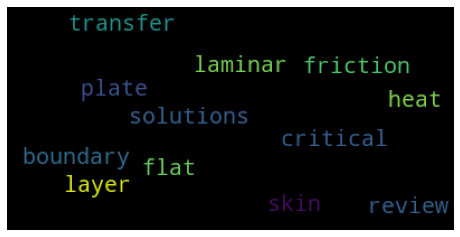

In [90]:
Search_engine2()

In [72]:
A[A.ID==int(1)][['ID','Title','Author','text_block']].drop_duplicates().set_index('ID').iloc[0,0]

' experimental investigation of the aerodynamics of a wing in a slipstream . '

In [73]:
A

,ID,Title,Author,info_abt_paper,text_block
0,1,experimental investigation of the aerodynamic...,"brenckman,m.","j. ae. scs. 25, 1958, 324.",experimental investigation of the aerodynamic...
1,2,simple shear flow past a flat plate in an inc...,ting-yili,"department of aeronautical engineering, renss...",simple shear flow past a flat plate in an inc...
2,3,the boundary layer in simple shear flow past ...,m. b. glauert,"department of mathematics, university of manc...",the boundary layer in simple shear flow past ...
3,4,approximate solutions of the incompressible l...,"yen,k.t.","j. ae. scs. 22, 1955, 728.",approximate solutions of the incompressible l...
4,5,one-dimensional transient heat conduction int...,"wasserman,b.","j. ae. scs. 24, 1957, 924.",one-dimensional transient heat conduction int...
...,...,...,...,...,...
1395,1396,shear buckling of clamped and simply-supporte...,"cook,i.t. and rockey,k.c.","aero. quart. 13, 1962, 41.",shear buckling of clamped and simply-supporte...
1396,1397,critical shear stress of an infinitely long s...,"stein,m. and fralich,r.w.","naca tn.1851, 1949.",critical shear stress of an infinitely long s...
1397,1398,stability of rectangular plates under shear a...,"way,s.","j. app. mech. 3, 1936, a131.",stability of rectangular plates under shear a...
1398,1399,buckling of transverse stiffened plates under...,"wang,t.k.","j.app.mech. 3,1947, a269.",buckling of transverse stiffened plates under...
